In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
true_w, true_b = 1, 2

In [3]:
np.random.seed(42)
epsilon = 0.1 * np.random.randn(N, 1)
X = np.random.rand(N, 1)
Y = true_w * X + true_b + epsilon

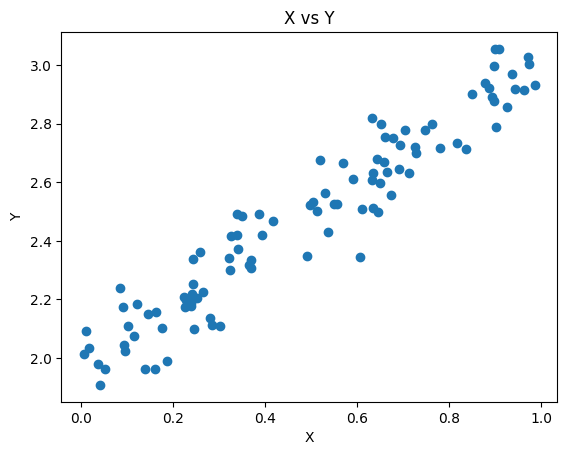

In [4]:
plt.scatter(X, Y)
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

We set `true_w` and `true_b` to get some points that are linearly separable, but in the real world these values aren't known: we have to figure them out ourselves. Let's start with random values of `w` and `b` and use gradient descent to find the optimal values of `w` and `b`

**Gradient Descent**

- Randomly initialize `w` and `b`
- Randomly pick a sample from `X` and it's corresponding `Y`, i.e `x` and `y`
- Make predictions using this random sample: `y_pred = wx + b`
- Calculate the error, e: `error = y_pred - y`
- Update the parameters:
  - `w = w - lr * w.grad`
  - `b = b - lr * b.grad`
  - Where `w.grad` and `b.grad` are the partial derivatives of the loss function with respect to `w` and `b` respectively.
    - `w.grad = error` * `x`
    - `b.grad = error`
- Repeat for N iterations

**P.S: This is Stochastic Gradient Descent (SGD) because we are using a single sample to compute the error (Loss)**

- Batch Gradient Descent: Uses all samples (X and Y) to compute the error (Loss) on each iteration
- Mini-batch Gradient Descent: Uses n (for example 20) samples to compute the error (Loss) on each iteration.



In [20]:
ITERATIONS = 1000
lr = 0.1

np.random.seed(42)
w, b = np.random.randn(1), np.random.randn(1)

for i in range(ITERATIONS):
    idx =  np.random.randint(N)
    x, y = X[idx], Y[idx]
    y_pred = w * x + b
    error = y_pred - y
    if i % 100 == 0:
        print(f"w: {w}, b: {b} -> error: {error}")
    w = w - lr * (error * x)
    b = b - lr * error

w: [0.49671415], b: [-0.1382643] -> error: [-2.33441441]
w: [1.23377915], b: [1.8526488] -> error: [-0.06279743]
w: [1.10706636], b: [1.92323462] -> error: [-0.00220071]
w: [1.10590363], b: [1.94945612] -> error: [0.14376576]
w: [1.07605594], b: [1.95421231] -> error: [-0.03252595]
w: [1.03808467], b: [1.96530393] -> error: [-0.05411506]
w: [1.0482161], b: [1.92755763] -> error: [-0.01372944]
w: [1.06533388], b: [1.97465558] -> error: [0.02865576]
w: [1.03083141], b: [1.95890366] -> error: [-0.02021401]
w: [1.01937596], b: [1.95632559] -> error: [0.00067496]


Okay, this works, but then we actually don't know when to stop - you might say just let the loop run for `ITERATIONS` times. But then how do we know what number to set `ITERATIONS` to? We can set it to 1e7 when we already found the optimal parameters (w and b) at the 1000th iteration. So to effectively know when to stop, we can track how the loss (not the error) is changing and stop if it doesn't reduce significantly, say if the `abs(loss - previous loss) <= TOLERANCE` we stop

Loss = $\frac{1}{2} \cdot (\text{error})^2$

In [22]:
ITERATIONS = 1000
TOLERANCE = 1e-5
lr = 0.1

prev_loss = float('inf')

np.random.seed(42)
w, b = np.random.randn(1), np.random.randn(1)

for i in range(ITERATIONS):
    idx =  np.random.randint(N)
    x, y = X[idx], Y[idx]
    y_pred = w * x + b
    error = y_pred - y
    loss = 0.5 * (error ** 2)

    if abs(loss - prev_loss) <= TOLERANCE:
        print(f"Early Stopping at iteration: {i}. w: {w}, b: {b} -> loss: {loss}")
        break

    if i % 100 == 0:
        print(f"w: {w}, b: {b} -> loss: {loss}")
    w = w - lr * (error * x)
    b = b - lr * error
    prev_loss = loss

w: [0.49671415], b: [-0.1382643] -> loss: [2.72474532]
w: [1.23377915], b: [1.8526488] -> loss: [0.00197176]
Early Stopping at iteration: 188. w: [1.11997998], b: [1.89132739] -> loss: [0.00023205]


### Mini-batch Gradient Descent

In [24]:
true_w, true_b, X.shape, Y.shape

(1, 2, (100, 1), (100, 1))

In [25]:
np.random.seed(42)
batch_idx = np.random.choice(X.shape[0], size=20, replace=False)
batch_idx

array([83, 53, 70, 45, 44, 39, 22, 80, 10,  0, 18, 30, 73, 33, 90,  4, 76,
       77, 12, 31])

In [26]:
X[batch_idx]

array([[0.22426931],
       [0.87733935],
       [0.64203165],
       [0.17436643],
       [0.64517279],
       [0.59089294],
       [0.14489487],
       [0.54873379],
       [0.96244729],
       [0.417411  ],
       [0.05147875],
       [0.36778313],
       [0.89855419],
       [0.53577468],
       [0.65761289],
       [0.9429097 ],
       [0.10147154],
       [0.66350177],
       [0.49724851],
       [0.63230583]])

In [44]:
ITERATIONS = 1000
TOLERANCE = 1e-5
lr = 0.01

prev_loss = float('inf')

np.random.seed(42)
w, b = np.random.randn(1), np.random.randn(1)


for i in range(ITERATIONS):
    batch_idx = np.random.choice(X.shape[0], size=32, replace=False)
    x, y = X[batch_idx], Y[batch_idx]
    y_pred = w * x + b
    error = y_pred - y
    loss = np.mean(error ** 2)
    # print(loss)

    if abs(loss - prev_loss) <= TOLERANCE:
        print(f"Early Stopping at iteration: {i}. w: {w}, b: {b} -> loss: {loss}, delta_loss: {abs(loss - prev_loss)}")
        break

    if i % 100 == 0:
        print(f"w: {w}, b: {b} -> loss: {loss}")
    w = w - lr * np.mean(error * x)
    b = b - lr * np.mean(error)
    prev_loss = loss

w: [0.49671415], b: [-0.1382643] -> loss: 5.685580745272601
w: [1.17550699], b: [1.22334056] -> loss: 0.4508135453376124
w: [1.34930294], b: [1.61682645] -> loss: 0.07073113376551533
w: [1.38139383], b: [1.74059474] -> loss: 0.016178605277816078
w: [1.37393648], b: [1.78192426] -> loss: 0.01894528131913526
w: [1.35634133], b: [1.8002586] -> loss: 0.01509657713174176
w: [1.33755296], b: [1.81302161] -> loss: 0.011945775085235422
w: [1.31986577], b: [1.82662889] -> loss: 0.012239723514431802
Early Stopping at iteration: 788. w: [1.30439775], b: [1.83466393] -> loss: 0.013631963798549758, delta_loss: 7.226448891523712e-06
